In [1]:
# LIBRAIRIES IMPORT
# Data
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium
# Metrics
from sklearn import metrics

# Elbow
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv(r"C:\Users\rana_\OneDrive\Bureau\Final project\data.csv")

In [3]:
data

,Unnamed: 0,Code du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,...,% Exp/Ins,% Exp/Vot,Sexe,Nom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel Région,latitude,longitude
0,0,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,...,75.00,100.00,1,11,3,6.82,NaN,44.0,49.317453,5.647972
1,1,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,...,75.00,100.00,1,7,5,11.36,NaN,44.0,49.317453,5.647972
2,2,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,...,75.00,100.00,0,9,1,2.27,NaN,44.0,49.317453,5.647972
3,3,55,55545,Verdun,808,329,40.72,479,59.28,17,...,56.81,95.82,1,8,8,0.99,NaN,44.0,49.160479,5.378136
4,4,55,55545,Verdun,1318,499,37.86,819,62.14,14,...,60.70,97.68,1,10,25,1.90,NaN,44.0,49.150832,5.400586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724003,836263,62,62796,Simencourt,459,78,16.99,381,83.01,6,...,81.05,97.64,0,2,7,1.53,NaN,32.0,50.258141,2.643003
724004,836264,62,62801,Souchez,1205,299,24.81,906,75.19,9,...,74.27,98.79,0,2,25,2.07,NaN,32.0,50.391562,2.742967
724005,836265,62,62803,Surques,440,75,17.05,365,82.95,6,...,80.68,97.26,1,4,13,2.95,NaN,32.0,50.742017,1.919849
724006,836266,62,62803,Surques,440,75,17.05,365,82.95,6,...,80.68,97.26,1,1,9,2.05,NaN,32.0,50.742017,1.919849


In [4]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
data

,Code du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,% Exp/Ins,% Exp/Vot,Sexe,Nom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel Région,latitude,longitude
0,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,0.00,...,75.00,100.00,1,11,3,6.82,NaN,44.0,49.317453,5.647972
1,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,0.00,...,75.00,100.00,1,7,5,11.36,NaN,44.0,49.317453,5.647972
2,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,0.00,...,75.00,100.00,0,9,1,2.27,NaN,44.0,49.317453,5.647972
3,55,55545,Verdun,808,329,40.72,479,59.28,17,2.10,...,56.81,95.82,1,8,8,0.99,NaN,44.0,49.160479,5.378136
4,55,55545,Verdun,1318,499,37.86,819,62.14,14,1.06,...,60.70,97.68,1,10,25,1.90,NaN,44.0,49.150832,5.400586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724003,62,62796,Simencourt,459,78,16.99,381,83.01,6,1.31,...,81.05,97.64,0,2,7,1.53,NaN,32.0,50.258141,2.643003
724004,62,62801,Souchez,1205,299,24.81,906,75.19,9,0.75,...,74.27,98.79,0,2,25,2.07,NaN,32.0,50.391562,2.742967
724005,62,62803,Surques,440,75,17.05,365,82.95,6,1.36,...,80.68,97.26,1,4,13,2.95,NaN,32.0,50.742017,1.919849
724006,62,62803,Surques,440,75,17.05,365,82.95,6,1.36,...,80.68,97.26,1,1,9,2.05,NaN,32.0,50.742017,1.919849


In [5]:
data.describe()

,Code du département,Code de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,% Exp/Ins,% Exp/Vot,Sexe,Nom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel Région,latitude,longitude
count,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,...,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,724008.000000,0.0,724008.000000,724008.000000,724008.000000
mean,54.540044,54778.436852,684.465625,172.283621,23.542409,512.182004,76.450994,7.895946,1.211107,1.587258,...,74.676674,97.606844,0.666667,5.500000,41.730004,6.223061,NaN,48.576723,45.370567,2.351661
std,24.945811,24948.724831,684.217123,426.533052,8.746580,332.335109,8.766613,5.702302,0.792490,1.026440,...,8.780799,2.915252,0.471405,3.452055,71.298979,8.006790,NaN,26.503312,9.947209,10.747985
min,1.000000,1015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,-21.385490,-61.805514
25%,33.000000,33258.000000,310.000000,61.000000,18.410000,240.000000,73.570000,3.000000,0.750000,1.000000,...,71.880000,97.170000,0.000000,2.750000,5.000000,0.990000,NaN,27.000000,44.995330,0.383889
50%,57.000000,57195.000000,755.000000,166.000000,21.930000,553.000000,78.070000,7.000000,1.120000,1.480000,...,76.270000,97.860000,1.000000,5.500000,14.000000,2.500000,NaN,44.000000,47.449593,2.366410
75%,76.000000,76316.000000,965.000000,241.000000,26.430000,730.000000,81.590000,11.000000,1.560000,2.030000,...,79.760000,98.420000,1.000000,8.250000,43.000000,8.100000,NaN,75.000000,48.822659,4.703475
max,97.000000,97616.000000,111590.000000,77070.000000,100.000000,34520.000000,100.000000,164.000000,33.330000,50.000000,...,100.000000,100.000000,1.000000,11.000000,18165.000000,100.000000,NaN,93.000000,51.071491,55.800980


In [7]:
### sampling according to number of inscrits in each bureau
### We will transform it into 4 categories: 

# Create column
data.loc[data.Inscrits < data.Inscrits.quantile(0.25), 'Inscrits_category'] = 'small_number'
data.loc[(data.Inscrits >= data.Inscrits.quantile(0.25)) & (data.Inscrits < data.Inscrits.quantile(0.50)), 'Inscrits_category'] = 'medium_number'
data.loc[(data.Inscrits >= data.Inscrits.quantile(0.50)) & (data.Inscrits < data.Inscrits.quantile(0.75)), 'Inscrits_category'] = 'large_number'
data.loc[data.Inscrits >= data.Inscrits.quantile(0.75), 'Inscrits_category'] = 'very_large_number'


In [8]:
data

,Code du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,% Exp/Vot,Sexe,Nom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel Région,latitude,longitude,Inscrits_category
0,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,0.00,...,100.00,1,11,3,6.82,NaN,44.0,49.317453,5.647972,small_number
1,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,0.00,...,100.00,1,7,5,11.36,NaN,44.0,49.317453,5.647972,small_number
2,55,55535,Vaudoncourt,44,11,25.00,33,75.00,0,0.00,...,100.00,0,9,1,2.27,NaN,44.0,49.317453,5.647972,small_number
3,55,55545,Verdun,808,329,40.72,479,59.28,17,2.10,...,95.82,1,8,8,0.99,NaN,44.0,49.160479,5.378136,large_number
4,55,55545,Verdun,1318,499,37.86,819,62.14,14,1.06,...,97.68,1,10,25,1.90,NaN,44.0,49.150832,5.400586,very_large_number
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724003,62,62796,Simencourt,459,78,16.99,381,83.01,6,1.31,...,97.64,0,2,7,1.53,NaN,32.0,50.258141,2.643003,medium_number
724004,62,62801,Souchez,1205,299,24.81,906,75.19,9,0.75,...,98.79,0,2,25,2.07,NaN,32.0,50.391562,2.742967,very_large_number
724005,62,62803,Surques,440,75,17.05,365,82.95,6,1.36,...,97.26,1,4,13,2.95,NaN,32.0,50.742017,1.919849,medium_number
724006,62,62803,Surques,440,75,17.05,365,82.95,6,1.36,...,97.26,1,1,9,2.05,NaN,32.0,50.742017,1.919849,medium_number


In [9]:
prop=pd.DataFrame(data['Inscrits_category'].value_counts())
prop

,Inscrits_category
very_large_number,182064
medium_number,180948
small_number,180624
large_number,180372


In [10]:
data['Inscrits_category'].shape

(724008,)

In [11]:
prop

,Inscrits_category
very_large_number,182064
medium_number,180948
small_number,180624
large_number,180372


In [12]:
y = data['Inscrits_category'].value_counts().tolist()
y

[182064, 180948, 180624, 180372]

In [13]:
proportion= []
for i in y:
    print(i)
    p= i/len(data['Inscrits_category'])
    proportion.append(round(p,2))
print(proportion)

182064
180948
180624
180372
[0.25, 0.25, 0.25, 0.25]


In [14]:
50000*0.2515
(data.Inscrits_category.unique())

array(['small_number', 'large_number', 'very_large_number',
       'medium_number'], dtype=object)

In [15]:
d={}
for i,j in zip(data.Inscrits_category.unique(),range(4)):
    print(i)
    d[i]= data.loc[data.Inscrits_category==i].sample(n=round(50000*proportion[j]))
d["small_number"]
   

small_number
large_number
very_large_number
medium_number


,Code du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,% Exp/Vot,Sexe,Nom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel Région,latitude,longitude,Inscrits_category
2963,67,67078,Crastatt,224,40,17.86,184,82.14,3,1.34,...,97.28,1,1,5,2.23,NaN,44.0,48.658604,7.427292,small_number
267128,26,26046,Bellecombe-Tarendol,78,19,24.36,59,75.64,2,2.56,...,96.61,1,3,1,1.28,NaN,84.0,44.359795,5.345478,small_number
231093,71,71140,Collonge-la-Madeleine,28,5,17.86,23,82.14,0,0.00,...,100.00,1,11,1,3.57,NaN,27.0,46.940271,4.523208,small_number
155353,57,57657,Sotzeling,24,2,8.33,22,91.67,0,0.00,...,100.00,1,11,0,0.00,NaN,44.0,48.862980,6.636655,small_number
197915,62,62809,Ternas,108,30,27.78,78,72.22,2,1.85,...,97.44,1,3,0,0.00,NaN,32.0,50.342041,2.397008,small_number
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182567,52,52465,Saulxures,108,19,17.59,89,82.41,0,0.00,...,100.00,1,7,11,10.19,NaN,44.0,47.955033,5.586596,small_number
453609,62,62435,Herlincourt,86,10,11.63,76,88.37,3,3.49,...,94.74,0,9,4,4.65,NaN,32.0,50.345222,2.300138,small_number
21215,38,38216,Malleval-en-Vercors,63,7,11.11,56,88.89,0,0.00,...,98.21,1,7,23,36.51,NaN,84.0,45.146897,5.437579,small_number
98719,54,54030,Autrepierre,75,10,13.33,65,86.67,0,0.00,...,100.00,1,6,17,22.67,NaN,44.0,48.611487,6.801905,small_number


In [95]:
print(d)

{'small_number':         Code du département  Code de la commune        Libellé de la commune  \
417448                   32               32015               Aujan-Mournède   
560145                   66               66215                   Trévillach   
145592                   28               28341  Saint-Jean-de-Rebervilliers   
159707                   55               55386             Nonsard-Lamarche   
597041                   82               82004                       Asques   
...                     ...                 ...                          ...   
249321                   62               62607           Neuville-au-Cornet   
608741                   34               34236                        Rouet   
106083                   29               29246                   Saint-Eloy   
51650                    79               79346                      Le Vert   
467967                   54               54211                  Frémonville   

        Inscrits  Abst

In [16]:
sample_data = pd.concat([d['small_number'], d['large_number'], d['very_large_number'], d['medium_number']])

In [17]:
sample_data

,Code du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,% Exp/Vot,Sexe,Nom,Voix,% Voix/Ins,% Voix/Exp,Code Officiel Région,latitude,longitude,Inscrits_category
2963,67,67078,Crastatt,224,40,17.86,184,82.14,3,1.34,...,97.28,1,1,5,2.23,NaN,44.0,48.658604,7.427292,small_number
267128,26,26046,Bellecombe-Tarendol,78,19,24.36,59,75.64,2,2.56,...,96.61,1,3,1,1.28,NaN,84.0,44.359795,5.345478,small_number
231093,71,71140,Collonge-la-Madeleine,28,5,17.86,23,82.14,0,0.00,...,100.00,1,11,1,3.57,NaN,27.0,46.940271,4.523208,small_number
155353,57,57657,Sotzeling,24,2,8.33,22,91.67,0,0.00,...,100.00,1,11,0,0.00,NaN,44.0,48.862980,6.636655,small_number
197915,62,62809,Ternas,108,30,27.78,78,72.22,2,1.85,...,97.44,1,3,0,0.00,NaN,32.0,50.342041,2.397008,small_number
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704281,36,36053,Ciron,393,81,20.61,312,79.39,4,1.02,...,97.76,1,4,12,3.05,NaN,24.0,46.630823,1.250521,medium_number
457562,28,28385,Le Thieulin,320,75,23.44,245,76.56,4,1.25,...,97.55,1,6,58,18.13,NaN,24.0,48.404815,1.135246,medium_number
536816,63,63345,Saint-Genès-Champanelle,430,76,17.67,354,82.33,7,1.63,...,97.18,1,1,9,2.09,NaN,84.0,45.720254,3.005835,medium_number
247527,24,24443,Saint-Léon-sur-Vézère,357,70,19.61,287,80.39,10,2.80,...,95.82,1,4,13,3.64,NaN,75.0,45.014740,1.081939,medium_number


In [18]:
sample_data.to_csv(r"C:\Users\rana_\OneDrive\Bureau\Final project\sample_data.csv") 

In [19]:
# MODEL FITTING
X =sample_data[[ 'latitude','longitude ']]
model = DBSCAN(eps =2 , min_samples = 100, n_jobs=-1)
model.fit(X)

DBSCAN(eps=2, min_samples=100, n_jobs=-1)

In [140]:
# MODEL PREDICTION
X_predict = X.copy()
X_predict['cluster'] = model.fit_predict(X)
X_predict.cluster.value_counts()

 0    48292
 2      770
 1      715
 3      112
 4      108
-1        3
Name: cluster, dtype: int64

Text(0, 0.5, 'Distance')

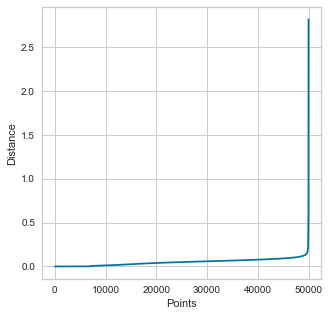

In [117]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.09110475046340909


<Figure size 360x360 with 0 Axes>

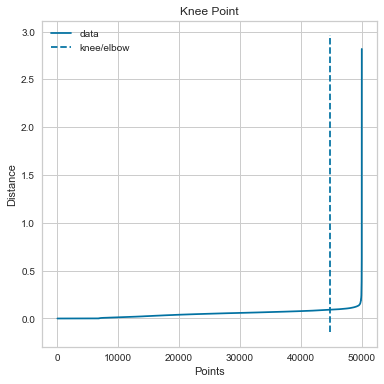

In [118]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
# SCORING

n_clusters = len(X_predict.cluster.unique())
labels = model.labels_

print(f'Estimated number of clusters: {n_clusters:d}')
print(f'Silhouette Score: {metrics.silhouette_score(X, labels, metric="sqeuclidean", random_state=42, sample_size = 10000):0.3f}')
print(f'Calinski-Harabasz Score: {metrics.calinski_harabasz_score(X, labels):.0f}')
print(f'Davies-Bouldin Score: {metrics.davies_bouldin_score(X, labels):0.3f}')